###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

### Plotting two normal distributions
Lets assume we have a feature that for two classes behaves as shown below by the normal distributions

In [1]:
import numpy as np

In [2]:
pts = 200
limit = (-5,5)
x = np.linspace(limit[0],limit[1],pts)

In [3]:
from scipy.stats import norm

In [4]:
negative = norm(-0.5, 1)
type(negative)

scipy.stats._distn_infrastructure.rv_frozen

In [5]:
positive = norm(0.5, 1)
type(positive)

scipy.stats._distn_infrastructure.rv_frozen

In [6]:
priors = (0.8, 0.2)

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'density x prior')

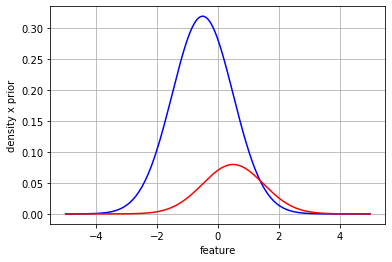

In [8]:
y_negative = negative.pdf(x) * priors[0]
y_positive = positive.pdf(x) * priors[1]
plt.plot(x,y_negative,'-b')
plt.plot(x,y_positive,'-r')
plt.grid()
plt.xlabel('feature')
plt.ylabel('density x prior')

### Representing probability of error

Text(0, 0.5, 'density x prior')

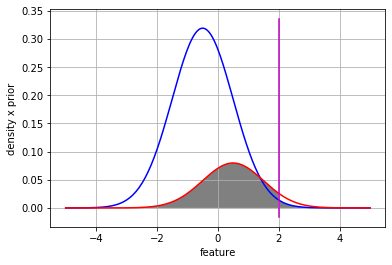

In [9]:
y_negative = negative.pdf(x) * priors[0]
y_positive = positive.pdf(x) * priors[1]
plt.plot(x,y_negative,'-b')
plt.plot(x,y_positive,'-r')
boundary = 2
plt.plot([boundary, boundary],plt.ylim(),'-m')
error = (x > boundary)
plt.fill_between(x, y_negative, where=error, facecolor='grey')
error = (x < boundary)
plt.fill_between(x, y_positive, where=error, facecolor='grey')
plt.xlabel('feature')
plt.ylabel('density x prior')
plt.grid()
plt.xlabel('feature')
plt.ylabel('density x prior')

### Estimating probability of error

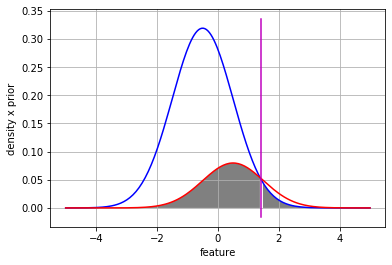

In [10]:
k = np.nonzero((y_negative > y_positive).astype(int) == 0)[0][0]
plt.plot(x,y_negative,'-b')
plt.plot(x,y_positive,'-r')
boundary = x[k]
plt.plot([boundary, boundary],plt.ylim(),'-m')
error = (x > boundary)
plt.fill_between(x, y_negative, where=error, facecolor='grey')
error = (x < boundary)
plt.fill_between(x, y_positive, where=error, facecolor='grey')
plt.xlabel('feature')
plt.ylabel('density x prior')
plt.grid()

In [11]:
perror = 0
dt = (limit[1] - limit[0])/pts
f = y_negative[x > boundary]
t = [i*dt for i in range(0,len(f))]
perror += np.trapz(f,t)
f = y_positive[x < boundary]
t = [i*dt for i in range(0,len(f))]
perror += np.trapz(f,t)
perror

0.18029329083328052

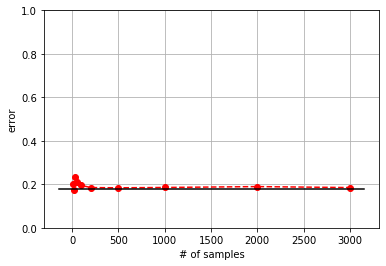

In [12]:
amount = [10, 20, 30, 50, 100, 200, 500, 1000, 2000, 3000];
error = np.zeros(len(amount));
for k in range(len(amount)):
    obs = negative.rvs(int(2*amount[k]*priors[0]))
    error[k] += (obs > boundary).sum()                  
    obs = positive.rvs(int(2*amount[k]*priors[1]))       
    error[k] += (obs < boundary).sum();          
    error[k] = error[k] / (2 * amount[k]);
plt.plot(amount,error,'--or')
plt.plot(plt.xlim(),[perror]*2,'-k')
plt.ylim([0,1])
plt.xlabel('# of samples');
plt.ylabel('error');
plt.grid()

### More about boundary

In [13]:
from scipy.stats import multivariate_normal

In [14]:
points = 100
priors = [0.8, 0.2]  
mu0 = [-2, -2]
sigma0 = [[2, 0.2], [0.2, 2]]
mu1 = [2, 1]
sigma1 = [[1, 0.1], [0.1, 1]]
limit = [-5, 5]
x1 = np.linspace(limit[0],limit[1],points)
x2 = np.linspace(limit[0],limit[1],points)
[x1,x2] = np.meshgrid(x1,x2)
p0 = multivariate_normal(mean=mu0,cov=sigma0)
p1 = multivariate_normal(mean=mu1,cov=sigma1)

In [15]:
y0 = p0.pdf(np.vstack((x1.flatten(), x2.flatten())).T)
y1 = p1.pdf(np.vstack((x1.flatten(), x2.flatten())).T)

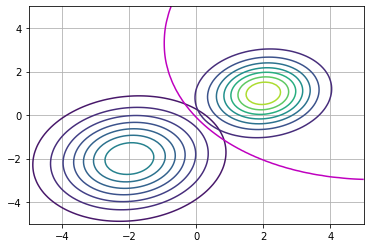

In [16]:
maximum = np.vstack((y0,y1)).max()
cl0 = plt.contour(x1,x2,y0.reshape(points,points),vmin=0, vmax=maximum)
cl1 = plt.contour(x1,x2,y1.reshape(points,points),vmin=0, vmax=maximum)
g = y0 - y1
plt.contour(x1,x2,g.reshape(points,points),levels=[0],colors='m',)
plt.grid()